In [1]:
import numpy as np

In [2]:
#Creates an array from zero to ninen with length of ten
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.arange(10).reshape(5,2) #with reshape, the array was spllitted into 5 lists, each one with a length of two

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_gender = pd.read_csv('/Users/luisfelipemh/Desktop/Personal/python_study_ML/titanic_gender_submission.csv')
data_test = pd.read_csv('/Users/luisfelipemh/Desktop/Personal/python_study_ML/titanic_test.csv')
data_train = pd.read_csv('/Users/luisfelipemh/Desktop/Personal/python_study_ML/titanic_train.csv')

In [6]:
for i in ['_gender','_test','_train']:
    print('data{}'.format(i))
    print(locals()['data'+str(i)].shape)

data_gender
(418, 2)
data_test
(418, 11)
data_train
(891, 12)


In [7]:
#we are going to begin the analysis with the training data
data_train.isnull().sum()
#We saw that the train dataset has null values, so we must correct this problem

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

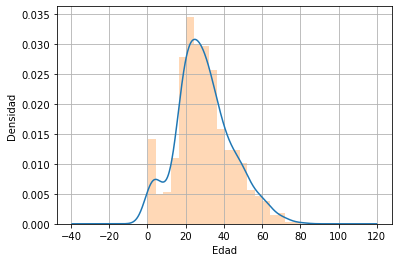

In [8]:
#bins: the number of bars
#Instead of count in the Y axis, we get the density
#Alpha: change the color intensity
data_train['Age'].plot(kind='density')
#We can put one graph above other
data_train['Age'].hist(bins=20, density=True,alpha=0.3).set(xlabel='Edad',ylabel='Densidad') 
plt.show()

In [9]:
#%.1f keeps the first decimal
print('The mean of "Age" is %.1f' %(data_train["Age"].mean(skipna=True)))

The mean of "Age" is 29.7


In [10]:
#Cabin missed values
data_train.isnull().sum()['Cabin']/data_train.shape[0]
#77% of missed value, we should ignore this column

0.7710437710437711

In [11]:
#Embarked missed values
data_train.isnull().sum()['Embarked']/data_train.shape[0]

0.002244668911335578

In [12]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
#With len, we saw de count of columns in a pandas series
pd.pivot_table(data_train,index=['Embarked'],values=['PassengerId'],aggfunc=len)

,PassengerId
Embarked,
C,168
Q,77
S,644


In [14]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

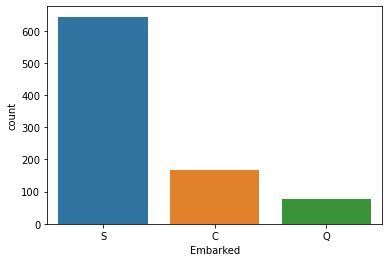

In [15]:
#Making a count plot
sns.countplot(data=data_train,x='Embarked')
#Most shipments were at the port S

# It's the time to replace the data

In [16]:
data_train.isnull().sum()[data_train.isnull().sum()!=0].index.tolist()

['Age', 'Cabin', 'Embarked']

In [17]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
data_train['Embarked'].dtype=='object'

True

In [19]:
lista=[]
for i in [data_test,data_train]:
     for j in i.isnull().sum()[i.isnull().sum()!=0].index.tolist():
            if i[j].dtype=='float64' and (i[j].isnull().sum()/i[j].shape[0])<0.6:
                i[j].fillna(i[j].median(skipna=True),inplace=True)
            elif i[j].dtype=='object' and (i[j].isnull().sum()/i[j].shape[0])<0.6:
                i[j].fillna(i[j].value_counts().idxmax(),inplace=True)
            else:
                lista.append(j)
x=list(set(lista))
for i in [data_test,data_train]:
    i=i.drop(x,axis=1,inplace=True)

In [20]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
def TravelAlone(x,y):
    if (x+y)>0:
        return 0
    else: 
        return 1

In [24]:
#The kaggle data dictionary says that SibSp and Parch relate to travelling with family
data_train['TravelAlone']=data_train.apply(lambda x: TravelAlone(x['SibSp'],x['Parch']),axis=1)
#other form through np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

In [25]:
#we are going to eliminate SibSp and Parch
data_train.drop('SibSp', axis=1,inplace=True)
data_train.drop('Parch', axis=1,inplace=True)

In [26]:
def dummies(data):
    for i in data.columns:
        if len(data[i].unique())>=3 and len(data[i].unique())<=10:
            dummies = pd.get_dummies(data[i],drop_first=True,prefix=i)
            data=pd.concat([data,dummies], axis=1)
            data.drop([i],axis=1,inplace=True)
        elif data[i].dtypes=='O' and len(data[i].unique())<=10:
            if len(data[i].unique())==2:
                dummies = pd.get_dummies(data[i],drop_first=True,prefix=i)
            else:
                dummies = pd.get_dummies(data[i],drop_first=True,prefix=i)
            data=pd.concat([data,dummies], axis=1)
            data.drop([i],axis=1,inplace=True)
        elif data[i].dtypes=='O' and len(data[i].unique())>10:
            data.drop([i],axis=1,inplace=True)
    return data

In [27]:
data_train=dummies(data_train)

In [28]:
data_train

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,0,0,1,1,0,1
1,2,1,38.0,71.2833,0,0,0,0,0,0
2,3,1,26.0,7.9250,1,0,1,0,0,1
3,4,1,35.0,53.1000,0,0,0,0,0,1
4,5,0,35.0,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,13.0000,1,1,0,1,0,1
887,888,1,19.0,30.0000,1,0,0,0,0,1
888,889,0,28.0,23.4500,0,0,1,0,0,1
889,890,1,26.0,30.0000,1,0,0,1,0,0


In [29]:
#The kaggle data dictionary says that SibSp and Parch relate to travelling with family
data_test['TravelAlone']=data_test.apply(lambda x: TravelAlone(x['SibSp'],x['Parch']),axis=1)
data_test.drop('SibSp', axis=1,inplace=True)
data_test.drop('Parch', axis=1,inplace=True)

In [30]:
data_test=dummies(data_test)

In [31]:
data_train=data_train.drop(['PassengerId'],axis=1)

In [32]:
data_test=data_test.drop(['PassengerId'],axis=1)

In [33]:
data_train['IsMinor']=np.where(data_train['Age']<=16, 1, 0)

In [34]:
data_test['IsMinor']=np.where(data_test['Age']<=16, 1, 0)

# Feature selection

In [35]:
#We are going to use recursive feature elimination
X=data_train.drop(['Survived'],axis=1)
y=data_train['Survived']

In [36]:
X.head()

,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor
0,22.0,7.2500,0,0,1,1,0,1,0
1,38.0,71.2833,0,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,0,1,0
3,35.0,53.1000,0,0,0,0,0,1,0
4,35.0,8.0500,1,0,1,1,0,1,0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [38]:
#our model is a logistic regression
model=LogisticRegression()

In [39]:
#RFE is a feature selection algotihm
#Feature selectio refers to techniques that select a subset of the most relevant features (Columns) for a dataset.
#Fewer charateristhics can allow machine learning algorithms to run more efficiently.
#Some machine learning algorithms can be misled (engañado) by irrelevant inputs

In [40]:
rfe = RFE(model,8)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [41]:
rfe = rfe.fit(X,y)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [42]:
relevant_columns=list(zip(X.columns,rfe.support_))

In [43]:
#This are the relevant columns that we are going to use in the machine learning model
relevant_columns

[('Age', True),
 ('Fare', False),
 ('TravelAlone', True),
 ('Pclass_2', True),
 ('Pclass_3', True),
 ('Sex_male', True),
 ('Embarked_Q', True),
 ('Embarked_S', True),
 ('IsMinor', True)]

In [44]:
#RFECV perform a RFE in a cross-validation loop to find the optimal number or the best number of features
#RFECV (Recursive feature elimination with cross validation) to select the number of features
from sklearn.feature_selection import RFECV

In [45]:
rfecv = RFECV(estimator=LogisticRegression(),step=1, cv=10, scoring='accuracy')

In [46]:
rfecv.fit(X,y)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [47]:
#Says me which is the optimal number of features
rfecv.n_features_

8

In [48]:
dict(list(zip(X.columns,rfecv.support_)))

{'Age': True,
 'Fare': False,
 'TravelAlone': True,
 'Pclass_2': True,
 'Pclass_3': True,
 'Sex_male': True,
 'Embarked_Q': True,
 'Embarked_S': True,
 'IsMinor': True}

In [49]:
rfecv.grid_scores_

array([0.78672909, 0.78672909, 0.79682896, 0.79571785, 0.79460674,
       0.79460674, 0.80024969, 0.80248439, 0.7935206 ])

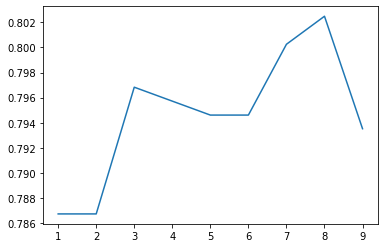

In [50]:
# Plot number of features VS. cross-validation-score
#Its necessary to add 1
#With eight features, the cross validation score is higher than other number of features
plt.plot(range(0+1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [51]:
#We replace the true values obtained by RFECV analysis
#a dictionary is comppsed of (keys, values)
dict(list(zip(X.columns,rfecv.support_))).items() #we transform de list into a dictionary

dict_items([('Age', True), ('Fare', False), ('TravelAlone', True), ('Pclass_2', True), ('Pclass_3', True), ('Sex_male', True), ('Embarked_Q', True), ('Embarked_S', True), ('IsMinor', True)])

In [52]:
features_dictionary={}
for (key,value) in dict(list(zip(X.columns,rfecv.support_))).items():
    if value==True:
        features_dictionary[key]=value
list_features=list(features_dictionary.keys())

In [53]:
list_features

['Age',
 'TravelAlone',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'IsMinor']

In [54]:
#We filtrer the training that with the mos important features
X=X[list_features]

In [55]:
#Train split results
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [56]:
#Test size indicates me which percentage of the data we are gooing to use for testing the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [58]:
#make the predictions on the X_test
y_pred = logreg.predict(X_test)#return the predicted labels of Y

In [59]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [60]:
#return the  probability of survive or not survived
#left side shows you the probability of 0
#right side show you the probability of 1
y_pred_proba=logreg.predict_proba(X_test)[:,1]

In [61]:
y_pred_proba

array([0.29468344, 0.08050062, 0.7996697 , 0.06756476, 0.54863353,
       0.06423863, 0.13015912, 0.07285428, 0.2514991 , 0.2373726 ,
       0.1922225 , 0.86283446, 0.63373885, 0.06756476, 0.06756476,
       0.53521873, 0.10566683, 0.03946184, 0.65898487, 0.04268624,
       0.56578909, 0.59593628, 0.14330605, 0.52175279, 0.13385713,
       0.75796761, 0.66449636, 0.32314483, 0.06756476, 0.12465841,
       0.08252355, 0.05515449, 0.73232735, 0.37884642, 0.41871306,
       0.48799227, 0.87823899, 0.20056299, 0.06756476, 0.1922225 ,
       0.05240497, 0.0448403 , 0.51543579, 0.08657275, 0.08050062,
       0.4990491 , 0.9019472 , 0.06756476, 0.12218047, 0.78665605,
       0.06756476, 0.24676584, 0.22301149, 0.26740057, 0.20512435,
       0.2618084 , 0.71061603, 0.08050062, 0.0374636 , 0.06106552,
       0.71086044, 0.49210772, 0.05657968, 0.06756476, 0.752976  ,
       0.05953447, 0.81599961, 0.22722955, 0.20056299, 0.08873354,
       0.50150058, 0.02047845, 0.60160628, 0.06756476, 0.48842

In [62]:
#thorugh whis way, we can split an array with two lists into threelists
[fpr, tpr, thr]=roc_curve(y_test, y_pred_proba)

In [63]:
tpr

array([0.        , 0.01265823, 0.40506329, 0.40506329, 0.43037975,
       0.43037975, 0.4556962 , 0.4556962 , 0.48101266, 0.48101266,
       0.53164557, 0.53164557, 0.56962025, 0.56962025, 0.58227848,
       0.60759494, 0.62025316, 0.62025316, 0.63291139, 0.63291139,
       0.67088608, 0.67088608, 0.6835443 , 0.69620253, 0.69620253,
       0.72151899, 0.73417722, 0.75949367, 0.75949367, 0.7721519 ,
       0.7721519 , 0.81012658, 0.81012658, 0.81012658, 0.81012658,
       0.81012658, 0.81012658, 0.81012658, 0.81012658, 0.82278481,
       0.82278481, 0.83544304, 0.83544304, 0.87341772, 0.87341772,
       0.88607595, 0.88607595, 0.88607595, 0.88607595, 0.88607595,
       0.88607595, 0.88607595, 0.88607595, 0.89873418, 0.89873418,
       0.91139241, 0.96202532, 0.96202532, 0.96202532, 0.97468354,
       0.97468354, 0.97468354, 0.97468354, 0.97468354, 0.98734177,
       0.98734177, 1.        , 1.        ])

In [64]:
#Accuracy score : TP+TN/(TP+FP+FN+TN)
accuracy_score(y_test,y_pred)

0.7877094972067039

In [65]:
log_loss(y_test,y_pred_proba)

0.5053777359441186

In [66]:
#Is the are unde ROC curve
auc(fpr,tpr)

0.8389240506329113

In [67]:
idx=np.min(np.where(tpr>0.95)) #index of the first threshold fo which sensibility (true positive rate)> 0.95
#the first, the lowest threshold, when sensibility is higher than 0n.95

In [68]:
#it is the optimal threshold
thr[idx]

0.06756475568589385

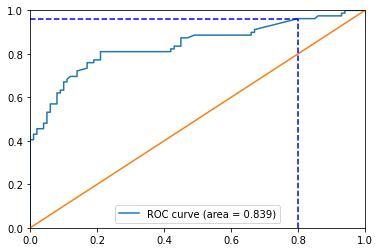

In [69]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area = %0.3f)' % auc(fpr, tpr)) #with 0.3 wek keep 3 decimals
#xlabel, ylabel
plt.plot([0,1],[0,1]) #proportions of correct classifications are equal of the proportions of the incorrect classification
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.legend(loc='best') #Label only works with plt. legend
plt.xlim([0.0, 1.0]) #wiht xlim, we can limit the plot without blank spaces
plt.ylim([0.0, 1.0])
plt.show()

In [70]:
#Sensitivity is similar to true positive rate
print('Optimal threshold %0.3f' % thr[idx]+'\n'+'Sensitivity %0.3f' % tpr[idx]+'\n'+
     'Specificity %0.3f' % (1-fpr[idx]))

Optimal threshold 0.068
Sensitivity 0.962
Specificity 0.200


# Cross validation with 10 fold

In [71]:
logreg = LogisticRegression()

In [72]:
import warnings
warnings.simplefilter(action='ignore')

In [73]:
for i in ['accuracy', 'neg_log_loss', 'roc_auc']:
    print(f'{i} '+str(abs(cross_val_score(logreg, X, y, cv=10,scoring=i).mean())))

accuracy 0.8047315855181024
neg_log_loss 0.4543499000376621
roc_auc 0.8503329372152901


# Cross validation based on K-fold using cross_validate(

In [74]:
from sklearn.model_selection import cross_validate

In [75]:
scoring = ['accuracy', 'neg_log_loss', 'roc_auc']

In [76]:
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

In [77]:
scoring_list=list(scoring.values())

In [78]:
scoring_list

['accuracy', 'neg_log_loss', 'roc_auc']

In [79]:
results

{'fit_time': array([0.04332089, 0.02712107, 0.01995277, 0.02275515, 0.01926565,
        0.01532102, 0.01710296, 0.01531529, 0.02159619, 0.02232003]),
 'score_time': array([0.00598931, 0.00379181, 0.003371  , 0.00328708, 0.003232  ,
        0.00327921, 0.00326991, 0.00320697, 0.00465178, 0.004493  ]),
 'test_accuracy': array([0.78888889, 0.80898876, 0.7752809 , 0.85393258, 0.79775281,
        0.79775281, 0.7752809 , 0.7752809 , 0.84269663, 0.83146067]),
 'test_neg_log_loss': array([-0.47316832, -0.47020307, -0.54231046, -0.41195124, -0.42866396,
        -0.45253136, -0.43639607, -0.47880583, -0.40706114, -0.44240755]),
 'test_roc_auc': array([0.8374026 , 0.85213904, 0.7828877 , 0.89518717, 0.85240642,
        0.85213904, 0.85855615, 0.83235294, 0.87941176, 0.86084656])}

In [81]:
print('K-fold cross-validation results:')
for i in range(len(scoring_list)):
    #Object oriented programming
    print(modelCV.__class__.__name__+
          " average %s: %0.2f" %
          #this is the accuracy,log_loss, etc.
          #we use test_%s look results
          #Mirar donde se compoen cada uno
          #Mirar ls corchetes
        (list(scoring_list)[i], abs(results['test_%s' 
                                               % scoring_list[i]].mean()))) #Filtrando por llave, similar a la lista

K-fold cross-validation results:
LogisticRegression average accuracy: 0.80
LogisticRegression average neg_log_loss: 0.45
LogisticRegression average roc_auc: 0.85


In [82]:
scoring.values()

dict_values(['accuracy', 'neg_log_loss', 'roc_auc'])

In [83]:
#Logical of s and d
nombre = "John"
edad = 23
print("%s tiene %d años." % (nombre, edad))
###

John tiene 23 años.


In [84]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
X_test['Survived']=logreg.predict(X_test[list_features])

In [85]:
#final dataset with the preidictions
X_test

,Age,TravelAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor,Survived
707,42.0,1,0,0,1,0,1,0,0
37,21.0,1,0,1,1,0,1,0,0
615,24.0,0,1,0,0,0,1,0,1
169,28.0,1,0,1,1,0,1,0,0
68,17.0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
89,24.0,1,0,1,1,0,1,0,0
80,22.0,1,0,1,1,0,1,0,0
846,28.0,0,0,1,1,0,1,0,0
870,26.0,1,0,1,1,0,1,0,0


In [ ]:
L